In [1]:
from KP import KnapsackProblem, find_root
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
%matplotlib inline

### Plot Example
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

## Potential Landscape of Continuous Objective Function

We plot the function 

\begin{equation}
F_{N}\left(z; \{v_i\}, \{w_i\}, W\right) = - W \ln z - \ln (1-z) + \sum_{i=1}^N\ln \left(1+ z^{ w_i}e^{\beta v_i}\right),
\label{eq:knapsack_Fdef}
\end{equation}

for a random collection of weights and values. 

----

#### Weight, Value, and Limit

In [2]:
items = (
    ("map", 9, 150), ("compass", 13, 35), ("water", 153, 200), ("sandwich", 50, 160),
    ("glucose", 15, 60), ("tin", 68, 45), ("banana", 27, 60), ("apple", 39, 40),
    ("cheese", 23, 30), ("beer", 52, 10), ("suntan cream", 11, 70), ("camera", 32, 30),
    ("t-shirt", 24, 15), ("trousers", 48, 10), ("umbrella", 73, 40),
    ("waterproof trousers", 42, 70), ("waterproof overclothes", 43, 75),
    ("note-case", 22, 80), ("sunglasses", 7, 20), ("towel", 18, 12),
    ("socks", 4, 50), ("book", 30, 10),
    )

# defining weight and value vectors and weight limit
weight_vec = np.array([item[1] for item in items])
value_vec = np.array([item[2] for item in items])
Wlimit = 400

# defining instance of problem
KP_init = KnapsackProblem(weights = weight_vec, values = value_vec, limit = Wlimit)

#### Plotting Potential

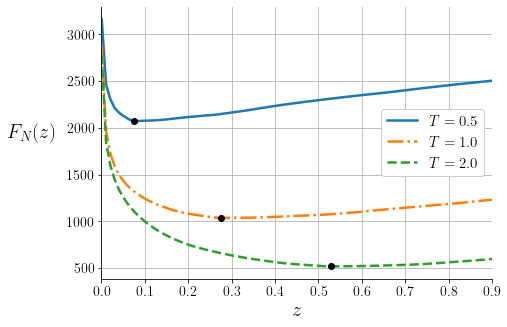

In [3]:
# plotting "Potential landscape"
# Taken from interior of `plot_potential_zero_one` in `potential_plots`

mvals = 100 # number of points to plot
ztest = np.linspace(0.001, 0.99, mvals) # values to evaluate potential
Tlist = [0.5, 1.0, 2.0]

# figure
plt.figure(figsize = (7, 5))
ax = plt.subplot(111)

marker_list = ['solid', 'dashdot', 'dashed']

# Plotting function for three temperature values
Fvals_dict = dict() # empty dictionary of F values
z0_dict = dict()
for i in range(len(Tlist)):
    Fvals_dict[i] = np.zeros(mvals)
    z0_dict[i], _ = find_root(KP_init.constraint, T=Tlist[i])
    for k in range(mvals):
        Fvals_dict[i][k] = KP_init.potential(z = ztest[k], T = Tlist[i])
        
    ax.plot(ztest, Fvals_dict[i], label = r'$T = %.1f$' % Tlist[i], linestyle = marker_list[i], linewidth = 2.5)

for i in range(len(Tlist)):    
    ax.plot(z0_dict[i], KP_init.potential(z = z0_dict[i], T = Tlist[i]), marker="o", markersize=6, markeredgecolor="black", markerfacecolor="black")
    

# plot sides
plt.xlabel(r'$z$', fontsize = 20)
plt.ylabel(r'$F_N(z)$', fontsize = 20, rotation = 0, labelpad = 35)
plt.yticks(fontsize= 14)
plt.xticks(fontsize=14)
plt.xlim(0, .9)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid()
plt.legend(loc = 'right', fontsize = 15, framealpha =1)
# plt.savefig('/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/2020_largeN_knapsack_problem/LaTeX_Scientific_reports/FN_plot_new.png', dpi = 100, bbox_inches='tight' )

plt.show()